In [1]:
import glob
import fitsio
import proplot as pplt
import numpy as np

In [3]:
import random

fnames = sorted(glob.glob("./data_final/*.fits"))
n_keep = 2

random.shuffle(fnames)

In [4]:
import tqdm

d = []
for i in tqdm.trange(n_keep):
    d.append(fitsio.read(fnames[i]))
d = np.concatenate(d)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.20s/it]


Text(0, 0.5, 'T/Tpsf')

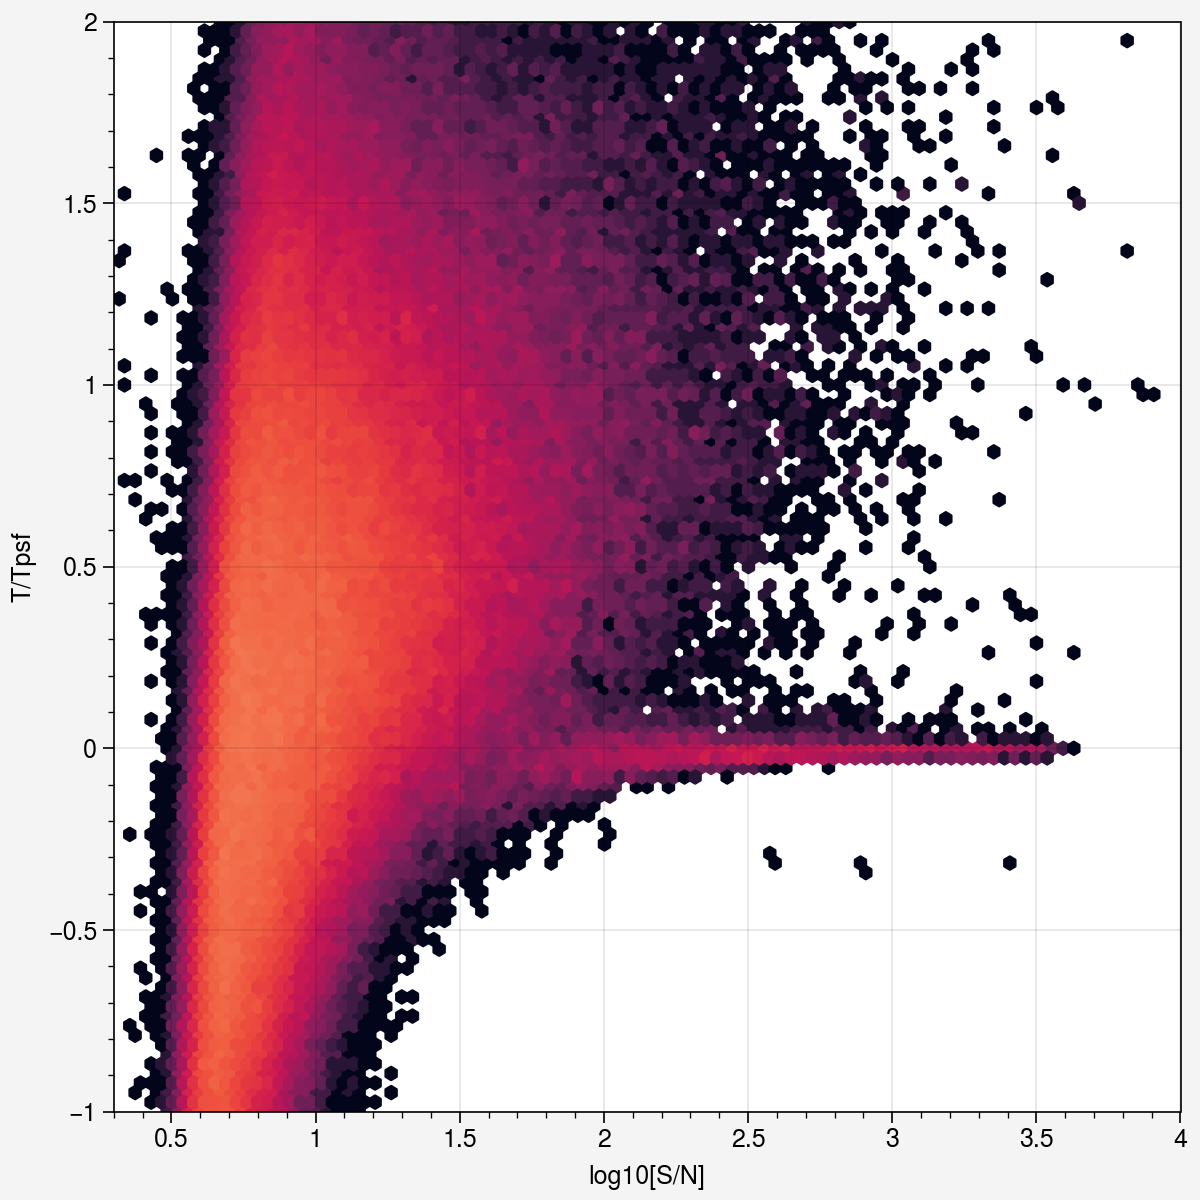

In [24]:
msk = (
    (d["mask_flags"] == 0)
    & (d["mfrac"] < 0.1)
    & (d["mdet_s2n"] > 2)
)

fig, axs = pplt.subplots(figsize=(6, 6))
axs.hexbin(
    np.log10(d["mdet_s2n"][msk]), 
    d["mdet_T_ratio"][msk], 
    bins=100, 
    norm="log", 
    cmap="rocket",
    extent=(0.3, 4, -1, 2)
)
# axs.axhline(np.log10(0.5), color="cyan")
axs.set_ylim(-1, 2)
axs.set_xlim(0.3, 4)
axs.set_xlabel("log10[S/N]")
axs.set_ylabel("T/Tpsf")

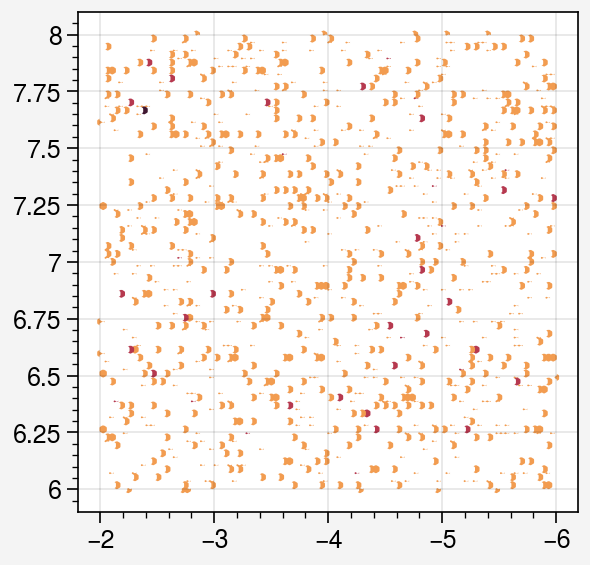

In [19]:
import proplot as pplt
import numpy as np

rng = np.random.RandomState(seed=10)
x = rng.uniform(size=1000)*4 - 6
y = rng.uniform(size=1000)*2 + 6

fig, axs = pplt.subplots()
axs.hexbin(x, y)

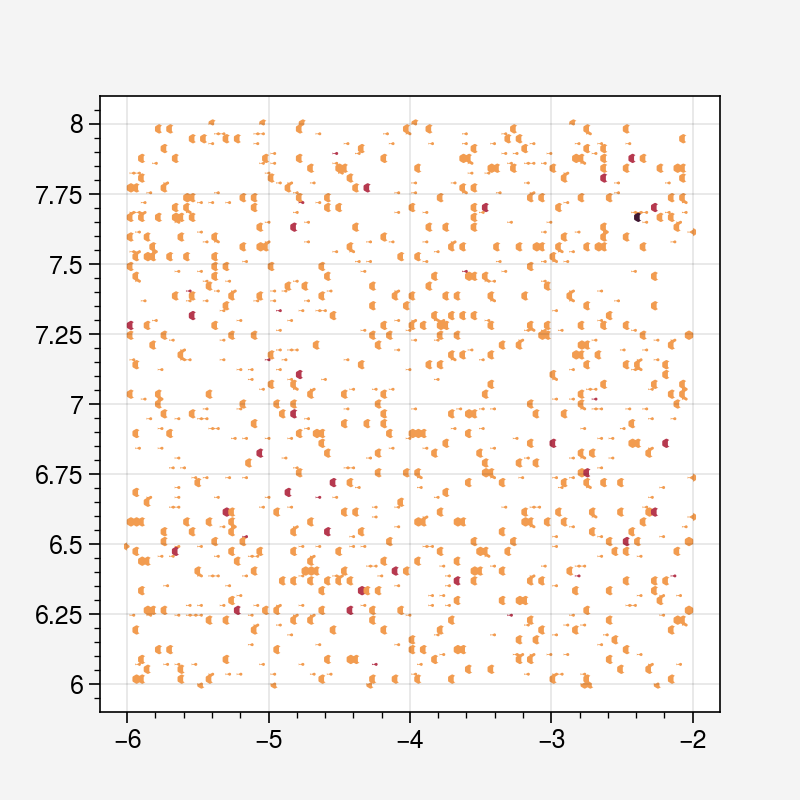

In [21]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(seed=10)
x = rng.uniform(size=1000)*4 - 6
y = rng.uniform(size=1000)*2 + 6

fig, axs = plt.subplots(nrows=1, ncols=1)
axs.hexbin(x, y)

In [14]:
import matplotlib; print(matplotlib.__version__); import proplot; print(proplot.version)

3.5.0
0.9.5


In [4]:
msk = (
    (d["flags"] == 0)
    & (d["mask_flags"] == 0)
    & (d["mdet_s2n"] > 10)
    & (d["mdet_s2n"] <= 100)    
    & (d["mdet_T_ratio"] > 0.5)
    & (d["mdet_T"] < 1.2)
    & (d["mfrac"] < 0.1)
)

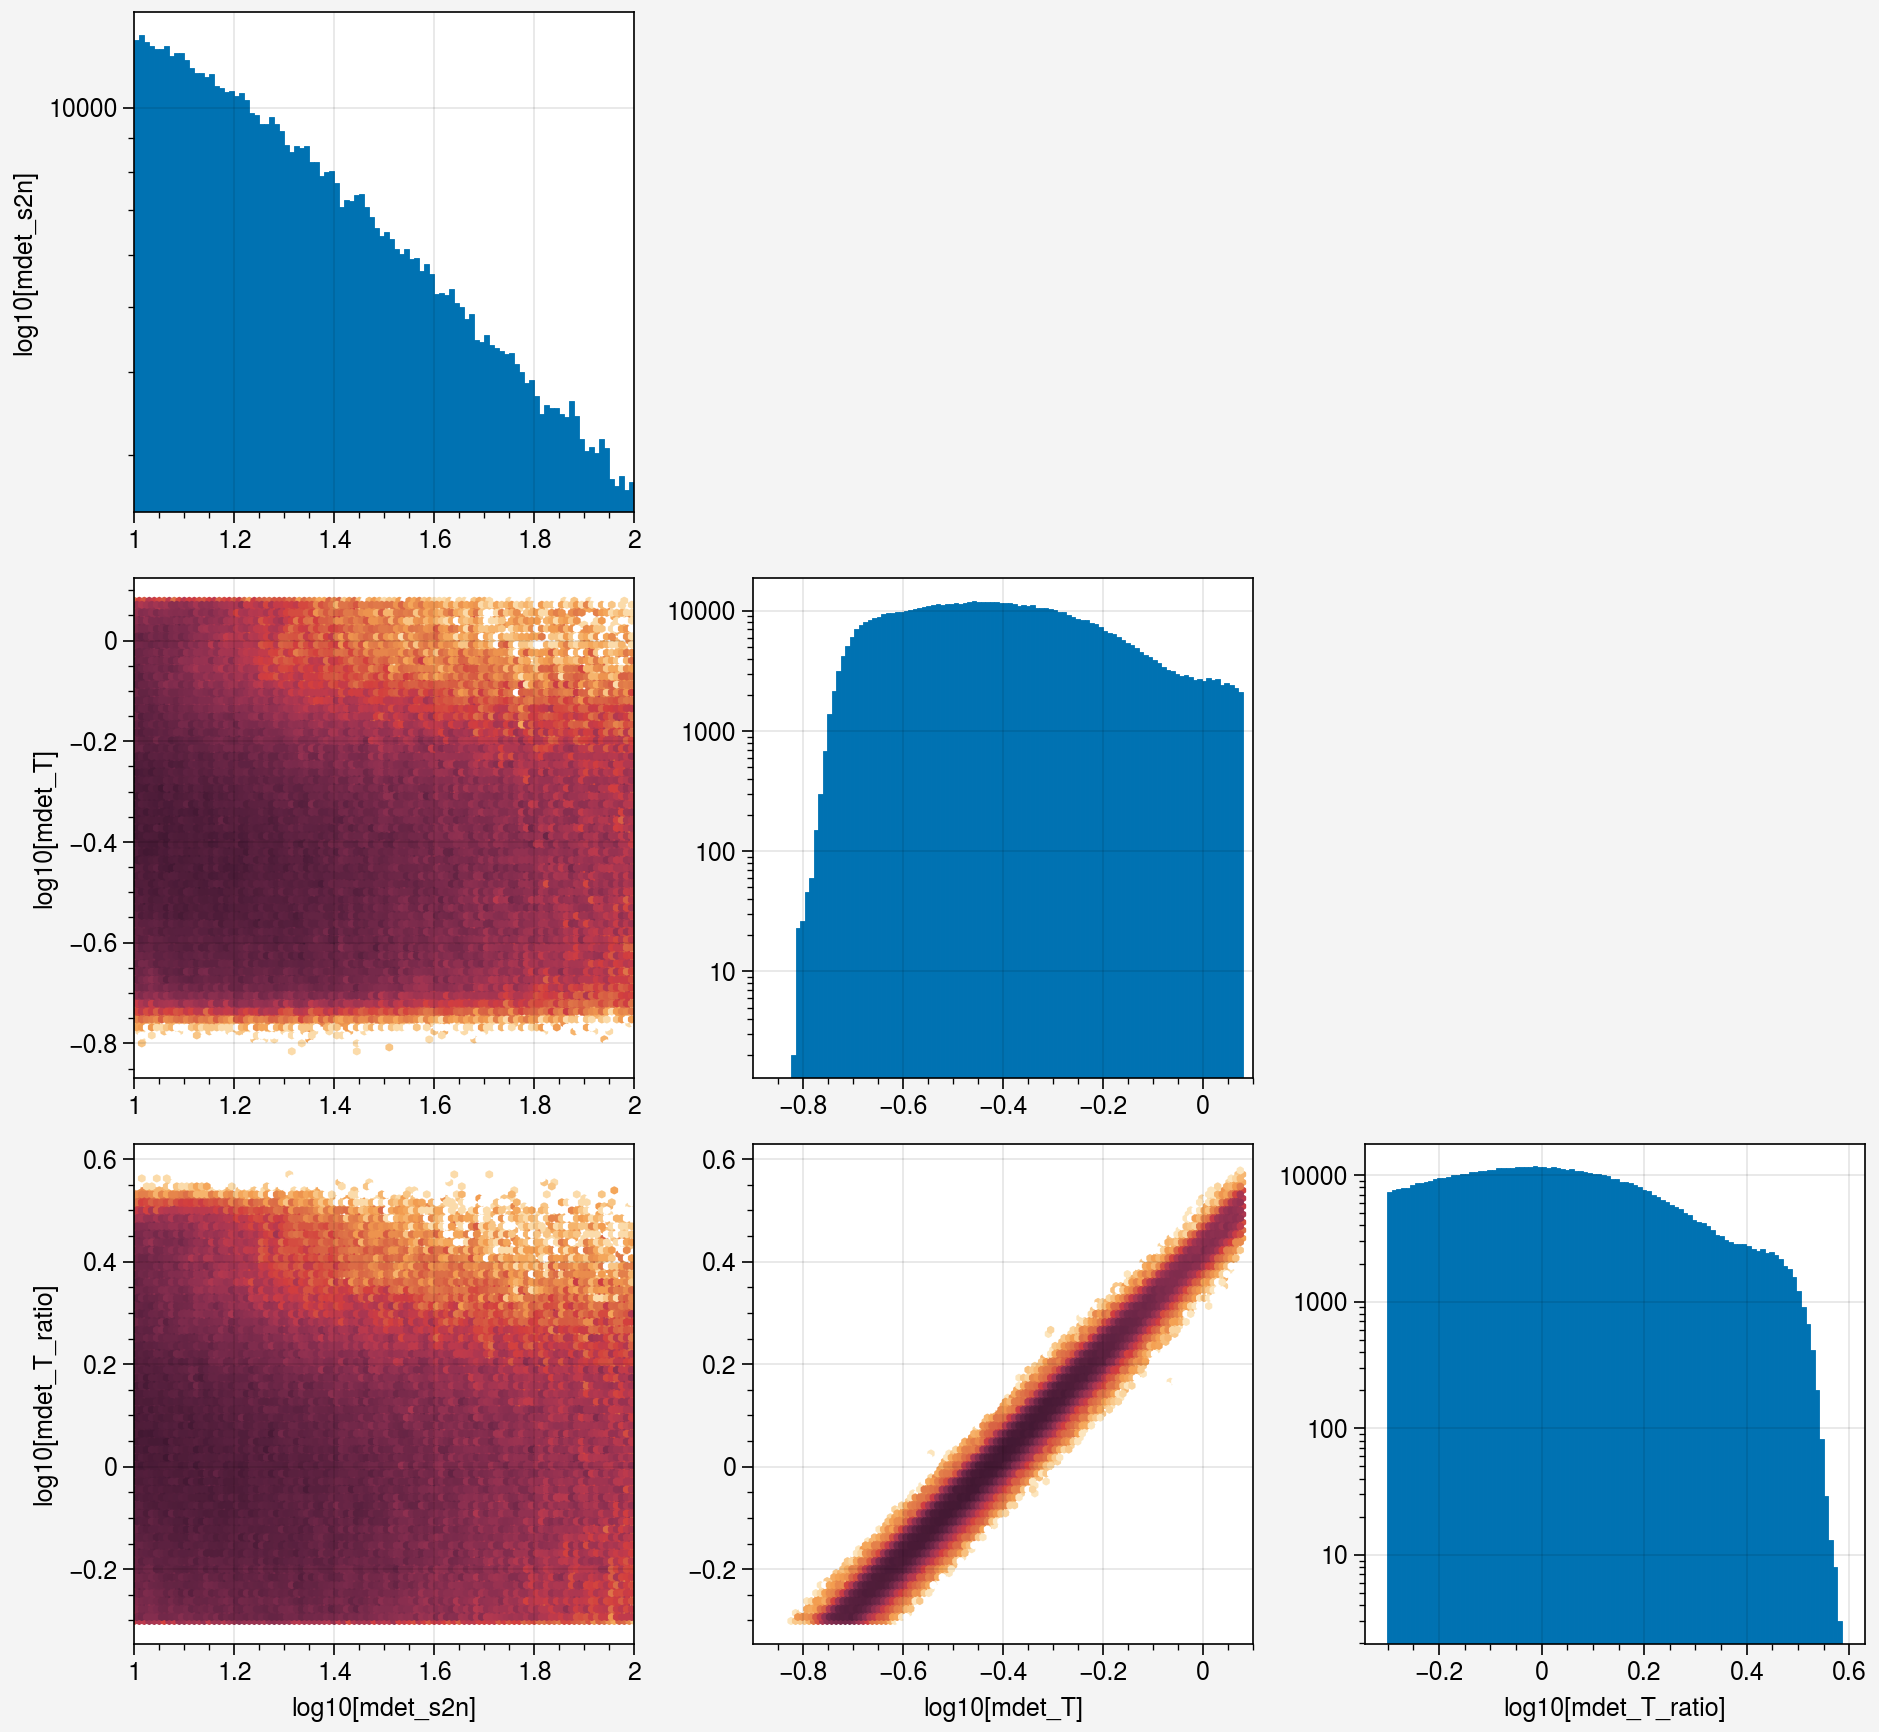

In [10]:
keys = ["mdet_s2n", "mdet_T", "mdet_T_ratio"]
n_keys = len(keys)

fig, axs = pplt.subplots(nrows=n_keys, ncols=n_keys, share=0)
for i in range(n_keys):
    ax = axs[i, i]
    ax.hist(np.log10(d[keys[i]][msk]), bins=100, log=True)

    if i == n_keys - 1:
        ax.set_xlabel("log10[%s]" % keys[i])
        
    if i == 0:
        ax.set_ylabel("log10[%s]" % keys[i])
        ax.set_xlim(1, 2)
        
    if i == 1:
        ax.set_xlim(-0.9, 0.1)

    for j in range(i+1, n_keys):
        ax = axs[j, i]
        ax.hexbin(
            np.log10(d[keys[i]][msk]), 
            np.log10(d[keys[j]][msk]), 
            norm="log",
        )
        
        if j == n_keys - 1:
            ax.set_xlabel("log10[%s]" % keys[i])

        if i == 0:
            ax.set_ylabel("log10[%s]" % keys[j])
            ax.set_xlim(1, 2)

        if i == 1:
            ax.set_xlim(-0.9, 0.1)

    for j in range(0, i):
        ax = axs[j, i]
        ax.axis("off")

    
        